This notebook makes heavy use of the starter guide
https://github.com/desihub/desisim/blob/master/doc/nb/simulating-desi-spectra.ipynb


In [57]:
%matplotlib inline

import os
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

In [58]:
import desispec.io
import desisim.io
from desisim.obs import new_exposure
from desisim.scripts import quickgen
from desispec.scripts import group_spectra

In [59]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/ryanrubenzahl/Library/Python/2.7/lib/python/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'seed', 'clf', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Make sure environments are setup properly

In [60]:
def check_env():
    for env in ('DESIMODEL', 'DESI_ROOT', 'DESI_SPECTRO_SIM', 'DESI_SPECTRO_DATA', 
            'DESI_SPECTRO_REDUX', 'SPECPROD', 'PIXPROD'):
        if env in os.environ:
            print('{} environment set to {}'.format(env, os.getenv(env)))
        else:
            print('Required environment variable {} not set!'.format(env))

In [61]:
check_env()

DESIMODEL environment set to /Users/ryanrubenzahl/Documents/DESI/code//desimodel
DESI_ROOT environment set to /Users/ryanrubenzahl/Documents/DESI
DESI_SPECTRO_SIM environment set to /Users/ryanrubenzahl/Documents/DESI/spectro/sim
DESI_SPECTRO_DATA environment set to /Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/
DESI_SPECTRO_REDUX environment set to /Users/ryanrubenzahl/Documents/DESI/spectro/redux
SPECPROD environment set to example
PIXPROD environment set to example


Reassign output directories so we don't mess anything up in the standard DESI integration test

In [62]:
%set_env SPECPROD=example
%set_env PIXPROD=example
rawdata_dir = desisim.io.simdir()
%set_env DESI_SPECTRO_DATA=$rawdata_dir

print('Simulated raw data will be written to {}'.format(desisim.io.simdir()))
print('Pipeline will read raw data from {}'.format(desispec.io.rawdata_root()))
print('    (without knowing that it was simulated)')
print('Paipeline will write processed data to {}'.format(desispec.io.specprod_root()))

env: SPECPROD=example
env: PIXPROD=example
env: DESI_SPECTRO_DATA=/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/
Simulated raw data will be written to /Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/
Pipeline will read raw data from /Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/
    (without knowing that it was simulated)
Pipeline will write processed data to /Users/ryanrubenzahl/Documents/DESI/spectro/redux/example


## Spectrum Simulation

In [63]:
# Some simulation parameters
nspec   = 1000 # number of spectra to simulate
seed    = 555  # simulation seed
flavor  = 'dark' # choose sky-brightness model and distribution of targets
flavors = ['dark', 'gray', 'grey', 'bright', 'bgs', 'mws', 'lrg', 'elg', 'qso', 'std', 'arc', 'flat'] # all options
night   = '20180201' # default is current date
expid   = 0 # exposure ID number, can use to simulate more than one DESI exposure

Generate the `fibermap` and `specsim` files needed by `quickgen`.

`fibermap` contains a table of simulated information about the position of each target in the DESI focal plane

`simspec` contains a table of "truth" spectra and the intrinsic properties of each object (e.g. redshift, noiseless photometry, [OII] flux, etc.)

See below for more information:
- http://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_SIM/PIXPROD/NIGHT/simspec-EXPID.html

- http://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_DATA/NIGHT/fibermap-EXPID.html

If you want to use your own mix of objects, you need to write your own fibermap and specsim files following the particular format (rather thanc alling `new_exposure`).

In [64]:
# Generate the fibermap and truth tables
# new_exposure generates random exposures of various types
output = new_exposure(flavor, nspec=nspec, seed=seed, night=night, 
                               expid=expid, tileid=None, exptime=None)

INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/star_templates_v2.1.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/star_templates_v2.1.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/star_templates_v2.1.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/star_templates_v2.1.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/lrg_templates_v1.3.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/lrg_templates_v1.3.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/lrg_template

/Users/ryanrubenzahl/Documents/DESI/code/desisim/py/desisim/targets.py:365: RuntimeWarning: divide by zero encountered in log10
  fibermap['MAG'][ii, 0] = 22.5 - 2.5 * np.log10(meta['FLUX_G'][ii])
/Users/ryanrubenzahl/Documents/DESI/code/desisim/py/desisim/targets.py:366: RuntimeWarning: divide by zero encountered in log10
  fibermap['MAG'][ii, 1] = 22.5 - 2.5 * np.log10(meta['FLUX_R'][ii])
/Users/ryanrubenzahl/Documents/DESI/code/desisim/py/desisim/targets.py:367: RuntimeWarning: divide by zero encountered in log10
  fibermap['MAG'][ii, 2] = 22.5 - 2.5 * np.log10(meta['FLUX_Z'][ii])
/Users/ryanrubenzahl/Documents/DESI/code/desisim/py/desisim/targets.py:368: RuntimeWarning: divide by zero encountered in log10
  fibermap['MAG'][ii, 3] = 22.5 - 2.5 * np.log10(meta['FLUX_W1'][ii])
/Users/ryanrubenzahl/Documents/DESI/code/desisim/py/desisim/targets.py:369: RuntimeWarning: divide by zero encountered in log10
  fibermap['MAG'][ii, 4] = 22.5 - 2.5 * np.log10(meta['FLUX_W2'][ii])


INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/elg_templates_v2.0.fits


/Users/ryanrubenzahl/Documents/DESI/code/desisim/py/desisim/targets.py:368: RuntimeWarning: invalid value encountered in log10
  fibermap['MAG'][ii, 3] = 22.5 - 2.5 * np.log10(meta['FLUX_W1'][ii])


INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/elg_templates_v2.0.fits


/Users/ryanrubenzahl/Documents/DESI/code/desisim/py/desisim/targets.py:368: RuntimeWarning: invalid value encountered in log10
  fibermap['MAG'][ii, 3] = 22.5 - 2.5 * np.log10(meta['FLUX_W1'][ii])


INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/elg_templates_v2.0.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/star_templates_v2.1.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/star_templates_v2.1.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/star_templates_v2.1.fits
INFO:io.py:974:read_basis_templates: Reading /Users/ryanrubenzahl/Documents/DESI/spectro/templates/basis_templates/v2.4/star_templates_v2.1.fits
DEBUG:simexp.py:383:simulate_spectra: loading specsim desi config
DEBUG:simexp.py:387:simulate_spectra: creating specsim desi simulator
INFO:simexp.py:408:simulate_spectra: MJD not in obsconditions, using DATE-OBS 2009-06-18T12:00:00.000
DEBUG:simexp.py:412:simulate_spectra: 

In [65]:
# Check in on data we just wrote
rawdata_dir = desispec.io.rawdata_root()
!find $rawdata_dir | sort

/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/
/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example//20180131
/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example//20180131/fibermap-00000000.fits
/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example//20180131/simspec-00000000.fits
/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example//20180201
/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example//20180201/fibermap-00000000.fits
/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example//20180201/simspec-00000000.fits
/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example//etc
/Users/ryanrubenzahl/Documents/DESI/spectro/sim/example//etc/obslog.sqlite


In [66]:
fiberfile   = desispec.io.findfile('fibermap', night=night, expid=expid)
simspecfile = desisim.io.findfile('simspec', night=night, expid=expid)

In [67]:
print('Reading fibermap file {}'.format(fiberfile))
hdu = fits.open(fiberfile)
hdu.info()
fibermap = Table(hdu['FIBERMAP'].data)
hdu.close()


Reading fibermap file /Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/20180201/fibermap-00000000.fits
Filename: /Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/20180201/fibermap-00000000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  FIBERMAP      1 BinTableHDU    113   1000R x 26C   [10A, 20A, 8A, K, K, K, K, 5E, 50A, J, K, J, J, J, J, E, D, D, D, D, D, D, D, D, E, E]   


In [68]:
fibermap[:3]

OBJTYPE,TARGETCAT,BRICKNAME,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,MAG [5],FILTER [5],SPECTROID,POSITIONER,LOCATION,DEVICE_LOC,PETAL_LOC,FIBER,LAMBDAREF,RA_TARGET,DEC_TARGET,RA_OBS,DEC_OBS,X_TARGET,Y_TARGET,X_FVCOBS,Y_FVCOBS,Y_FVCERR,X_FVCERR
str10,str20,str8,int64,int64,int64,int64,float32,str10,int32,int64,int32,int32,int32,int32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32
LRG,,3350p205,1161599546765783258,1,0,0,23.965 .. 18.516,DECAM_G .. WISE_W2,0,95,95,95,0,0,5400.0,335.04801413,20.5978747513,335.04801413,20.5978747513,-4.13464340313,-176.016389199,-4.13464340313,-176.016389199,0.0,0.0
LRG,,3353p205,6941272158692512815,1,0,0,22.9061 .. 19.075,DECAM_G .. WISE_W2,0,62,62,62,0,1,5400.0,335.228742316,20.5214871015,335.228742316,20.5214871015,-45.5863791815,-157.134697634,-45.5863791815,-157.134697634,0.0,0.0
ELG,,3352p207,544291026008501213,2,0,0,22.805 .. 21.7596,DECAM_G .. WISE_W2,0,102,102,102,0,2,5400.0,335.239863643,20.6715271643,335.239863643,20.6715271643,-48.26471976,-194.58679079,-48.26471976,-194.58679079,0.0,0.0


In [69]:
print('Reading simspec file {}.'.format(simspecfile))
hdu = fits.open(simspecfile)
hdu.info()
meta = Table(hdu['TRUTH'].data)
hdu.close()

Reading simspec file /Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/20180201/simspec-00000000.fits.
Filename: /Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/20180201/simspec-00000000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  WAVE          1 PrimaryHDU      58   (31900,)   float64   
  1  FLUX          1 ImageHDU         9   (31900, 1000)   float32   
  2  SKYFLUX       1 ImageHDU         9   (31900, 1000)   float32   
  3  WAVE_B        1 ImageHDU         7   (11896,)   float64   
  4  PHOT_B        1 ImageHDU         9   (11896, 1000)   float32   
  5  SKYPHOT_B     1 ImageHDU         9   (11896, 1000)   float32   
  6  WAVE_R        1 ImageHDU         7   (10575,)   float64   
  7  PHOT_R        1 ImageHDU         9   (10575, 1000)   float32   
  8  SKYPHOT_R     1 ImageHDU         9   (10575, 1000)   float32   
  9  WAVE_Z        1 ImageHDU         7   (11990,)   float64   
 10  PHOT_Z        1 ImageHDU         9   (11990, 1000)   floa

In [70]:
meta[:3]
# meta

OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
str10,str10,int32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
LRG,,66,3244113739,0.881887,19.7879,0.259422,2.13608,12.1574,54.7213,39.2301,-1.0,-1.0,-1.0,-1.0,1.68142,173.207,-1.0,-1.0,-1.0,-1.0,-1.0,0.019,2.81838,-1.0,-1.0,-1.0
LRG,,94,3952505139,0.517868,19.4825,0.687972,4.33103,16.1072,37.9772,23.4422,-1.0,-1.0,-1.0,-1.0,2.2449,173.207,-1.0,-1.0,-1.0,-1.0,-1.0,0.019,14.1254,-1.0,-1.0,-1.0
ELG,,4426,3244113739,1.18514,22.7893,0.755122,0.7661,1.4501,2.3653,1.97772,7.50738e-17,-1.0,56.9604,-1.0,1.06338,57.5023,0.733237,-0.0850786,0.275525,-0.248196,-0.19466,-1.0,-1.0,-1.0,-1.0,-1.0


## Histogram of redshift distributions

(0.2, 4.3210281372070316)

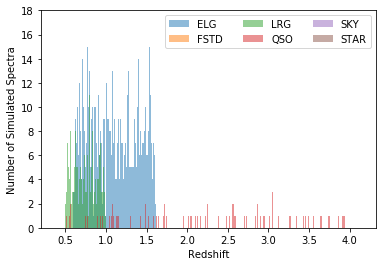

In [72]:
allobjtype = meta['OBJTYPE']
redlim = (--0.2, 1.1*meta['REDSHIFT'].max())
fig, ax = plt.subplots()
for objtype in sorted(set(allobjtype)):
    indx = objtype == allobjtype
    hh = ax.hist(meta['REDSHIFT'][indx], bins=nspec//3, 
                 label=objtype, alpha=0.5, range=redlim)
ax.set_xlabel('Redshift')
ax.set_ylabel('Number of Simulated Spectra')
ax.legend(loc='upper right', ncol=3)
ax.margins(0.2)
ax.set_xlim(redlim)

## Simulate spectra using quickgen

`quickgen` generates four files: `calib`, `sky`, `cframe`, and `frame`. We will use the `cframe` or "calibrated frame" files, which contain the flux-calibrated and sky-subtracted DESI spectra (one file per *brz* camera and spectrograph).

Documentation: http://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/PRODNAME/exposures/NIGHT/EXPID/index.html

In [73]:
# the call to quicksim from the command line looks like
# quickgen --simspec {simspecfile} --fibermap {fiberfile}
# here we call quicksim in an equivalent way

args = quickgen.parse(['--simspec', simspecfile, 
                       '--fibermap', fiberfile])
quickgen.main(args)

INFO:quickgen.py:210:main: Reading fibermap file /Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/20180201/fibermap-00000000.fits
DEBUG:simexp.py:620:get_source_types: elg 619 targets
DEBUG:simexp.py:620:get_source_types: lrg 174 targets
DEBUG:simexp.py:620:get_source_types: qso 107 targets
DEBUG:simexp.py:620:get_source_types: sky 80 targets
DEBUG:simexp.py:620:get_source_types: star 20 targets
INFO:quickgen.py:229:main: Initializing SpecSim with config desi
INFO:quickgen.py:235:main: Reading input file /Users/ryanrubenzahl/Documents/DESI/spectro/sim/example/20180201/simspec-00000000.fits
HIHIHIHIHIHIHIHIHIHIHIHIHIHIHI
nspec 1000
args.nspec 100
INFO:quickgen.py:589:main: Writing files for channel:b, spectrograph:0, spectra:0 to 500
INFO:quickgen.py:616:main: Wrote file /Users/ryanrubenzahl/Documents/DESI/spectro/redux/example/exposures/20180201/00000000/frame-b0-00000000.fits
INFO:quickgen.py:634:main: Wrote file /Users/ryanrubenzahl/Documents/DESI/spectro/redux/example/exposur

In [74]:
# Check the output of one of the cframes
# Lets look at the blue camera using desispec.io.frame.read_frame
cframefile = desispec.io.findfile('cframe', night=night, expid=expid, camera='b0')
print('Reading {}'.format(cframefile))
cframe = desispec.io.frame.read_frame(cframefile)

Reading /Users/ryanrubenzahl/Documents/DESI/spectro/redux/example/exposures/20180201/00000000/cframe-b0-00000000.fits


In [77]:
cframe

<Frame: nspec=500, nwave=4760>

In [78]:
dir(cframe)

['R',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'chi2pix',
 'fibermap',
 'fibers',
 'flux',
 'ivar',
 'mask',
 'meta',
 'ndiag',
 'nspec',
 'nwave',
 'resolution_data',
 'spectrograph',
 'vet',
 'wave',
 'wsigma']

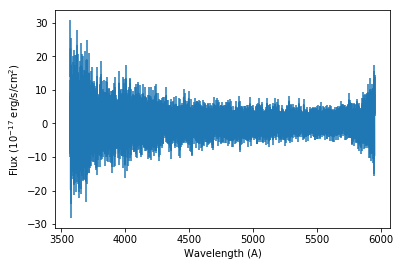

In [79]:
# Lets plot the 0th spectrum

fig, ax = plt.subplots()
ax.errorbar(cframe.wave, cframe.flux[0, :], 1/np.sqrt(cframe.ivar[0, :]))
ax.set_xlabel('Wavelength (A)')
ax.set_ylabel('Flux ($10^{-17}$ erg/s/cm$^2$)')

## Regroup the spectra

We combine and reorganize the individual `cframe` frames into `spectra` files grouped on the sky, using healpix pixels w/ nside=64.

Run the notebook equivalent of the line

`desi_group_spectra --hpxnside 64`

In [80]:
# nside = 64
# args = group_spectra.parse(['--hpxnside', '{}'.format(nside)])
# group_spectra.main(args)

# This isn't working at the moment, so lets not worry about it

## Combine cameras

In [81]:
# Check the output of one of the calib files
cframefile = desispec.io.findfile('cframe', night=night, expid=expid, camera='b0')
print('Reading {}'.format(cframefile))
cframe = desispec.io.frame.read_frame(cframefile)

Reading /Users/ryanrubenzahl/Documents/DESI/spectro/redux/example/exposures/20180201/00000000/cframe-b0-00000000.fits


In [82]:
allobjtype = meta['OBJTYPE']

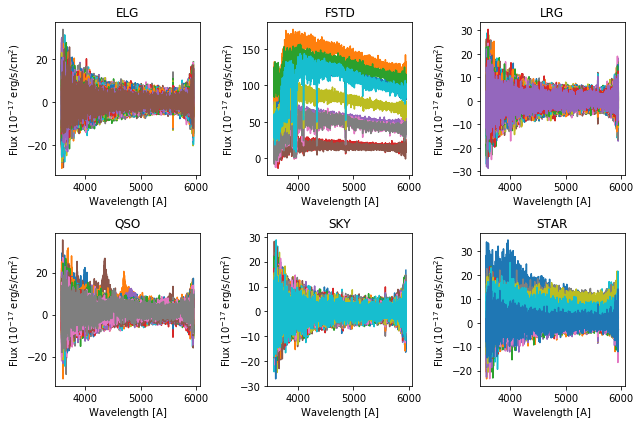

In [87]:
objs = sorted(set(allobjtype))

fig, ax = plt.subplots(2,3, figsize=(9, 6))
axes = [[0,0], [0,1], [0,2],
        [1,0], [1,1], [1,2]]

for axi, obj in zip(axes, objs):
    i, j = axi
    obj_indxs = np.argwhere(allobjtype==obj)
    for indx in obj_indxs:
        if indx[0] > cframe.nspec-1:
            continue
        ax[i,j].plot(cframe.wave, cframe.flux[indx[0]])
        
    ax[i,j].set_title(obj)
    ax[i,j].set_xlabel('Wavelength [A]')
    ax[i,j].set_ylabel('Flux ($10^{-17}$ erg/s/cm$^2$)')
            
# ax.margins(0)
fig.tight_layout()

## RandomForestClassifier on b0 camera spectra

In [88]:
from sklearn.ensemble import RandomForestClassifier

# seed = 555
np.random.seed(0)

In [89]:
meta[:5]

OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
str10,str10,int32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
LRG,,66,3244113739,0.881887,19.7879,0.259422,2.13608,12.1574,54.7213,39.2301,-1.0,-1.0,-1.0,-1.0,1.68142,173.207,-1.0,-1.0,-1.0,-1.0,-1.0,0.019,2.81838,-1.0,-1.0,-1.0
LRG,,94,3952505139,0.517868,19.4825,0.687972,4.33103,16.1072,37.9772,23.4422,-1.0,-1.0,-1.0,-1.0,2.2449,173.207,-1.0,-1.0,-1.0,-1.0,-1.0,0.019,14.1254,-1.0,-1.0,-1.0
ELG,,4426,3244113739,1.18514,22.7893,0.755122,0.7661,1.4501,2.3653,1.97772,7.50738e-17,-1.0,56.9604,-1.0,1.06338,57.5023,0.733237,-0.0850786,0.275525,-0.248196,-0.19466,-1.0,-1.0,-1.0,-1.0,-1.0
LRG,,116,369720621,0.811504,20.3715,0.13334,1.06204,7.10245,31.0123,19.8706,-1.0,-1.0,-1.0,-1.0,1.95457,173.207,-1.0,-1.0,-1.0,-1.0,-1.0,0.03,3.16228,-1.0,-1.0,-1.0
ELG,,4049,3952505139,1.08302,21.1707,3.42253,3.40176,5.47988,6.04448,4.40413,8.13558e-17,-1.0,13.9696,-1.0,1.00689,57.5023,0.757255,-0.00885063,0.630011,-0.265495,-0.230491,-1.0,-1.0,-1.0,-1.0,-1.0


In [90]:
# Make my own astropy table containing several columns of "truth"
# data from the meta table and several columns of corresponding
# simulated data from the cframe objects (mostly just wave + flux)

In [91]:
import pandas as pd

flux_df = pd.DataFrame(cframe.flux)

In [93]:
# flux_df
# df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
flux_df['objtype'] = allobjtype[:cframe.nspec]

In [94]:
flux_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4751,4752,4753,4754,4755,4756,4757,4758,4759,objtype
0,4.410804,0.628093,-0.502179,-1.475999,22.267246,6.197022,2.809343,-19.833023,2.712042,-2.116041,...,6.114013,-1.511344,6.520978,-0.957069,3.168773,-9.756361,-9.189075,8.521692,8.031245,LRG
1,7.152854,-1.176545,-12.818226,1.539278,25.437952,-10.506111,-1.041079,-1.101981,-5.951281,-12.795830,...,-8.095753,-0.465716,9.630847,-8.460913,9.275062,5.210396,2.711947,8.541580,-2.521765,LRG
2,4.936867,-5.997157,-5.356233,-2.577606,0.938796,-2.554553,-1.389192,-11.059829,1.382009,-7.364549,...,-0.076635,-1.027299,-4.059658,-2.669147,-7.592678,0.567462,5.787523,-5.122630,-1.789492,ELG
3,-4.475715,-0.934034,-5.268381,6.027055,1.273692,-9.990762,-5.313061,-6.793601,1.704484,-7.049758,...,6.140945,0.566090,-2.995291,-5.976245,-10.046648,10.939505,-5.960964,-14.280461,-9.941330,LRG
4,4.624043,-1.216521,-14.639175,-8.592257,7.348834,-5.630534,-11.366942,2.915127,13.407258,-18.993132,...,-6.198701,2.013230,4.596836,-3.721536,-3.316478,2.314479,-8.532804,6.727330,8.674607,ELG


In [95]:
# We now separate a portion of the data for training and testing use
# Here is a quick way to assign 75% of the data as training via new column
flux_df['is_train'] = np.random.uniform(0, 1, len(flux_df)) <= 0.75 

In [96]:
flux_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4752,4753,4754,4755,4756,4757,4758,4759,objtype,is_train
0,4.410804,0.628093,-0.502179,-1.475999,22.267246,6.197022,2.809343,-19.833023,2.712042,-2.116041,...,-1.511344,6.520978,-0.957069,3.168773,-9.756361,-9.189075,8.521692,8.031245,LRG,True
1,7.152854,-1.176545,-12.818226,1.539278,25.437952,-10.506111,-1.041079,-1.101981,-5.951281,-12.795830,...,-0.465716,9.630847,-8.460913,9.275062,5.210396,2.711947,8.541580,-2.521765,LRG,True
2,4.936867,-5.997157,-5.356233,-2.577606,0.938796,-2.554553,-1.389192,-11.059829,1.382009,-7.364549,...,-1.027299,-4.059658,-2.669147,-7.592678,0.567462,5.787523,-5.122630,-1.789492,ELG,True
3,-4.475715,-0.934034,-5.268381,6.027055,1.273692,-9.990762,-5.313061,-6.793601,1.704484,-7.049758,...,0.566090,-2.995291,-5.976245,-10.046648,10.939505,-5.960964,-14.280461,-9.941330,LRG,True
4,4.624043,-1.216521,-14.639175,-8.592257,7.348834,-5.630534,-11.366942,2.915127,13.407258,-18.993132,...,2.013230,4.596836,-3.721536,-3.316478,2.314479,-8.532804,6.727330,8.674607,ELG,True


In [97]:
# We now split the dataframes into a test and training dataset
train, test = flux_df[flux_df['is_train']==True], flux_df[flux_df['is_train']==False]
print 'Number of observations in the training data:', len(train)
print 'Number of observations in the test data:',len(test)

Number of observations in the training data: 381
Number of observations in the test data: 119


In [98]:
# Data preprocessing
features = flux_df.columns[:-2]
features

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4750, 4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759],
      dtype='object', length=4760)

In [99]:
# train['species'] has the "true" species names
# in order to compare later it needs to be coded into integers (0, 1, 2)

y = pd.factorize(train['objtype'])[0]
y

array([0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 4, 1, 1, 0, 1,
       1, 4, 1, 1, 5, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 3, 3, 4, 3, 1, 4, 1, 5,
       0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 3, 4, 1, 1, 4, 1, 1, 1,
       3, 1, 0, 1, 1, 0, 1, 0, 1, 3, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 3, 0, 1, 1, 3, 1, 3, 1, 0, 3, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1,
       5, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 4, 1, 1, 0, 1, 0, 1, 4,
       1, 0, 0, 1, 1, 3, 1, 4, 4, 0, 1, 0, 1, 1, 1, 0, 1, 1, 3, 1, 3, 1, 1,
       3, 1, 3, 3, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 0, 4,
       0, 1, 4, 4, 0, 1, 1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 3, 0, 3, 1, 1, 1,
       1, 3, 2, 4, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4,
       0, 1, 1, 1, 1, 4, 0, 3, 4, 0, 1, 0, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 5,
       1, 1, 3, 3, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 1, 1, 1, 0, 4, 2, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 4, 1,
       1, 0,

In [100]:
# Now we train the random forest
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(train[features], y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [101]:
# Apply the classifier to the test data
clf.predict(test[features])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

In [102]:
# View predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[ 0.1,  0.9,  0. ,  0. ,  0. ,  0. ],
       [ 0.1,  0.6,  0.1,  0.2,  0. ,  0. ],
       [ 0.1,  0.8,  0. ,  0.1,  0. ,  0. ],
       [ 0.3,  0.4,  0.1,  0.2,  0. ,  0. ],
       [ 0. ,  0.9,  0. ,  0. ,  0.1,  0. ],
       [ 0.2,  0.7,  0. ,  0.1,  0. ,  0. ],
       [ 0.2,  0.5,  0.1,  0. ,  0.2,  0. ],
       [ 0.2,  0.6,  0. ,  0.1,  0.1,  0. ],
       [ 0.1,  0.5,  0.1,  0.2,  0.1,  0. ],
       [ 0.3,  0.6,  0. ,  0.1,  0. ,  0. ]])

In [103]:
# Convert object number back to type
preds = allobjtype[clf.predict(test[features])]

print preds[0:5] # Predicted
print test['objtype'].head() # Actual

OBJTYPE
-------
    LRG
    LRG
    LRG
    LRG
    LRG
7     ELG
8     ELG
10    LRG
13    ELG
17    ELG
Name: objtype, dtype: object


In [104]:
# Display how well the classifier did via a confusion matrix
pd.crosstab(test['objtype'], preds, rownames=['Actual Object'], colnames=['Predicted Object'])

Predicted Object,ELG,LRG
Actual Object,,
ELG,0,70
FSTD,2,0
LRG,0,23
QSO,0,15
SKY,0,6
STAR,1,2


In [105]:
# View a list of the features and their importance scores
max_importance = 0
best_wavebin   = 0
for wavebin, importance in zip(train[features], clf.feature_importances_):
    if importance > 0:
        print wavebin, importance
        if max_importance < importance:
            max_importance = importance
            best_wavebin = wavebin

5 0.0034350463346
13 0.00402392252331
16 0.00278435218458
18 0.000711086226204
41 0.00110305675019
93 0.00191175823305
123 0.0018201700385
125 0.00124291498434
139 0.00250568897066
150 0.000895801597233
154 0.00187908070849
159 0.00143539144581
163 0.000912543209134
191 0.00457842693053
200 0.000943421329815
203 0.0018446789968
204 0.00503094271856
205 0.00230737290518
225 0.000614892998935
246 0.00445973233131
249 0.00211518603644
251 0.00309575602776
261 0.00291985610343
267 0.00287078289161
277 0.0042940232876
278 0.00387603757807
294 0.000687024965514
295 0.00237828925235
323 0.000758491974617
343 0.000438596491228
368 0.000951833716399
373 0.000634555810932
379 0.000632076645514
383 0.00264478556606
384 0.00346741231685
393 0.000713875287299
397 0.00155954878041
416 0.000338116998734
440 0.00120409120945
442 0.0026965658206
444 0.00301849028576
451 0.00565295634781
453 0.000883317812803
470 0.00112023506622
486 0.000475916858199
490 0.000888378135305
501 0.001359762452
502 0.00090

In [106]:
print best_wavebin, max_importance

3743 0.018248609728
